# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import PCA

# Load Datasets

In [2]:
features = pd.read_csv("training_set_features.csv")
target = pd.read_csv("training_set_labels.csv")
testing = pd.read_csv("test_set_features.csv")

In [3]:
df = pd.concat([features,target],axis=1)

# Data Exploration

In [4]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [5]:
testing.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [6]:
df.shape

(26707, 39)

In [7]:
# droping irrelevant columns
df.drop(['respondent_id','employment_industry','employment_occupation'],axis=1,inplace=True)
testing.drop(['respondent_id','employment_industry','employment_occupation'],axis=1,inplace=True)

In [8]:
for col in testing.columns:
    print(testing[col].value_counts())

2.0    10743
1.0     8158
3.0     4523
0.0     3199
Name: xyz_concern, dtype: int64
1.0    14629
2.0     9515
0.0     2442
Name: xyz_knowledge, dtype: int64
0.0    25307
1.0     1322
Name: behavioral_antiviral_meds, dtype: int64
1.0    19336
0.0     7159
Name: behavioral_avoidance, dtype: int64
0.0    24840
1.0     1849
Name: behavioral_face_mask, dtype: int64
1.0    22030
0.0     4638
Name: behavioral_wash_hands, dtype: int64
0.0    17273
1.0     9363
Name: behavioral_large_gatherings, dtype: int64
0.0    17647
1.0     8979
Name: behavioral_outside_home, dtype: int64
1.0    18174
0.0     8406
Name: behavioral_touch_face, dtype: int64
0.0    19082
1.0     5466
Name: doctor_recc_xyz, dtype: int64
0.0    16360
1.0     8188
Name: doctor_recc_seasonal, dtype: int64
0.0    18532
1.0     7244
Name: chronic_med_condition, dtype: int64
0.0    23660
1.0     2235
Name: child_under_6_months, dtype: int64
0.0    23029
1.0     2890
Name: health_worker, dtype: int64
1.0    12857
0.0     1623
Name: h

C:\Users\anuj\AppData\Local\Temp\ipykernel_1616\3429588068.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

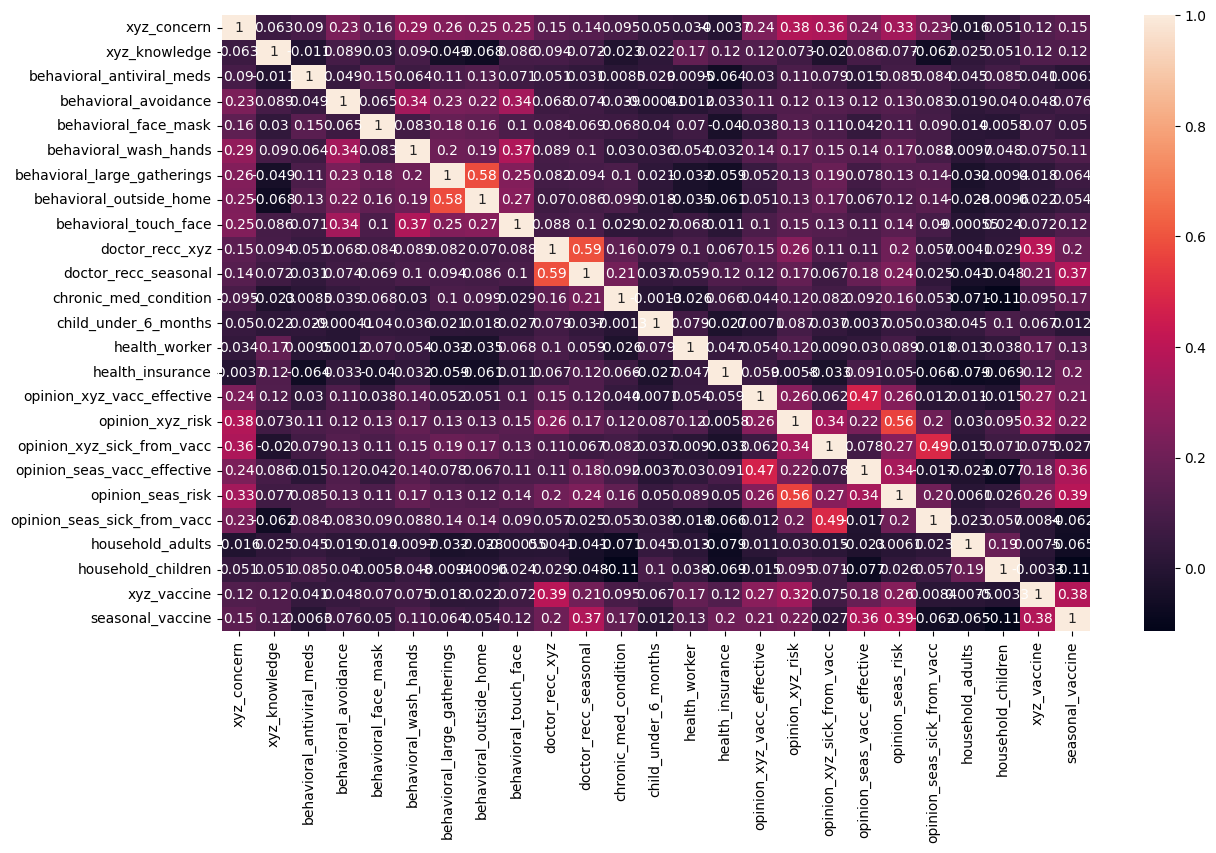

In [9]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df.corr(),annot=True)

In [10]:
df.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [11]:
float_columns = df.select_dtypes(include=['float']).columns.tolist()
float_columns

['xyz_concern',
 'xyz_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_xyz',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_xyz_vacc_effective',
 'opinion_xyz_risk',
 'opinion_xyz_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [12]:
#imputing missing values by applying knn imputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df[float_columns] = imputer.fit_transform(df[float_columns])
testing[float_columns] = imputer.fit_transform(testing[float_columns])

In [13]:
df.isnull().sum()

xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

In [14]:
na_cols = ["education","income_poverty","marital_status","rent_or_own","employment_status"]

for i in na_cols:
    df[i].fillna("Missing",inplace=True)
    testing[i].fillna("Missing",inplace=True)

In [15]:
df.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26707 non-null  float64
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_xyz              26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

C:\Users\anuj\AppData\Local\Temp\ipykernel_1616\3429588068.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

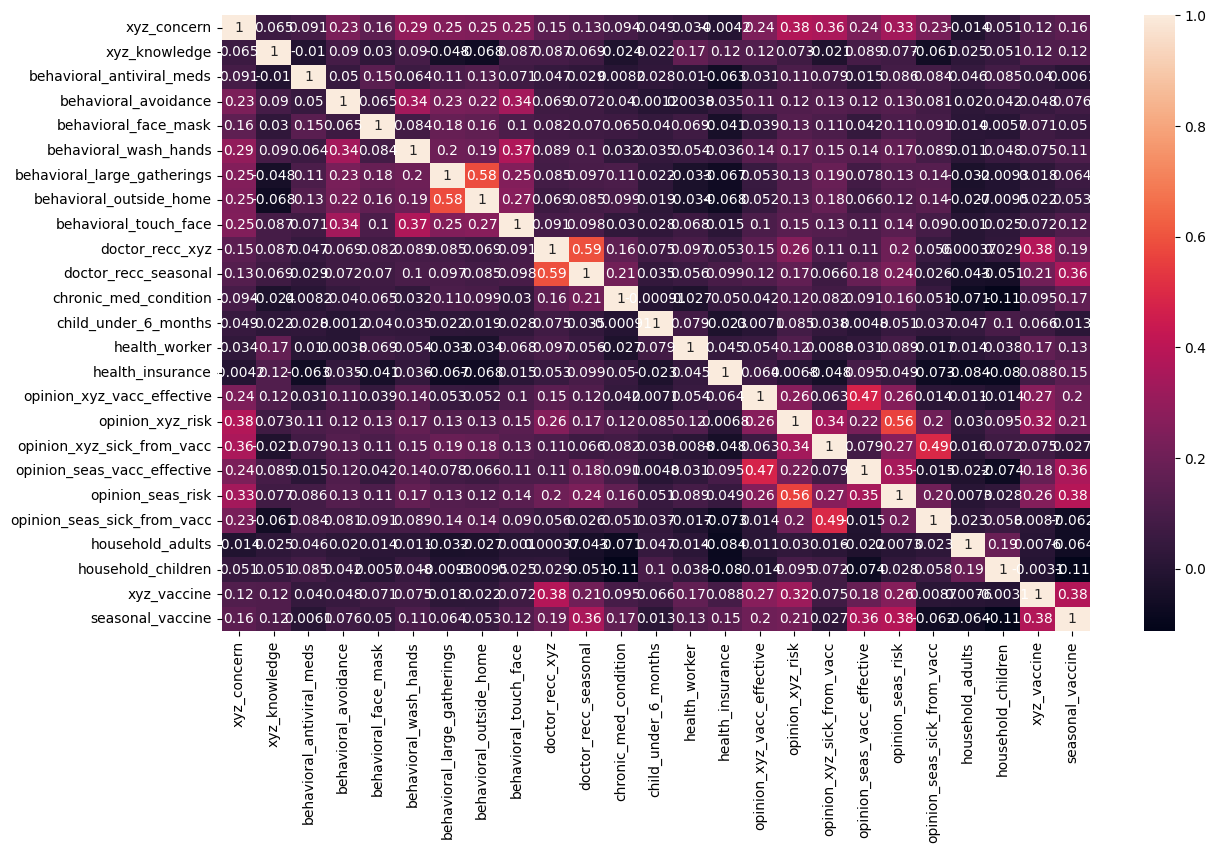

In [17]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df.corr(),annot=True)

In [18]:
# Label encoding

object_columns = df.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])
    testing[col] = label_encoder.transform(testing[col])

In [19]:
df.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,2,1,2,8,2,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,2,2,0,1,0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,2,1,0,9,0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,2,2,2,5,1,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2,4,3,0,0,0,1,0,9,0,1.0,0.0,0,0


In [20]:
testing.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1,2,1,0,1,2,2,0,7,0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,0,0,3,1,2,2,2,0,1,2,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,3,2,3,1,1,0,1,0,5,2,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,4,0,3,0,0,0,1,2,5,0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,1,0,0,0,0,2,1,0,6,2,0.0,1.0


<AxesSubplot: >

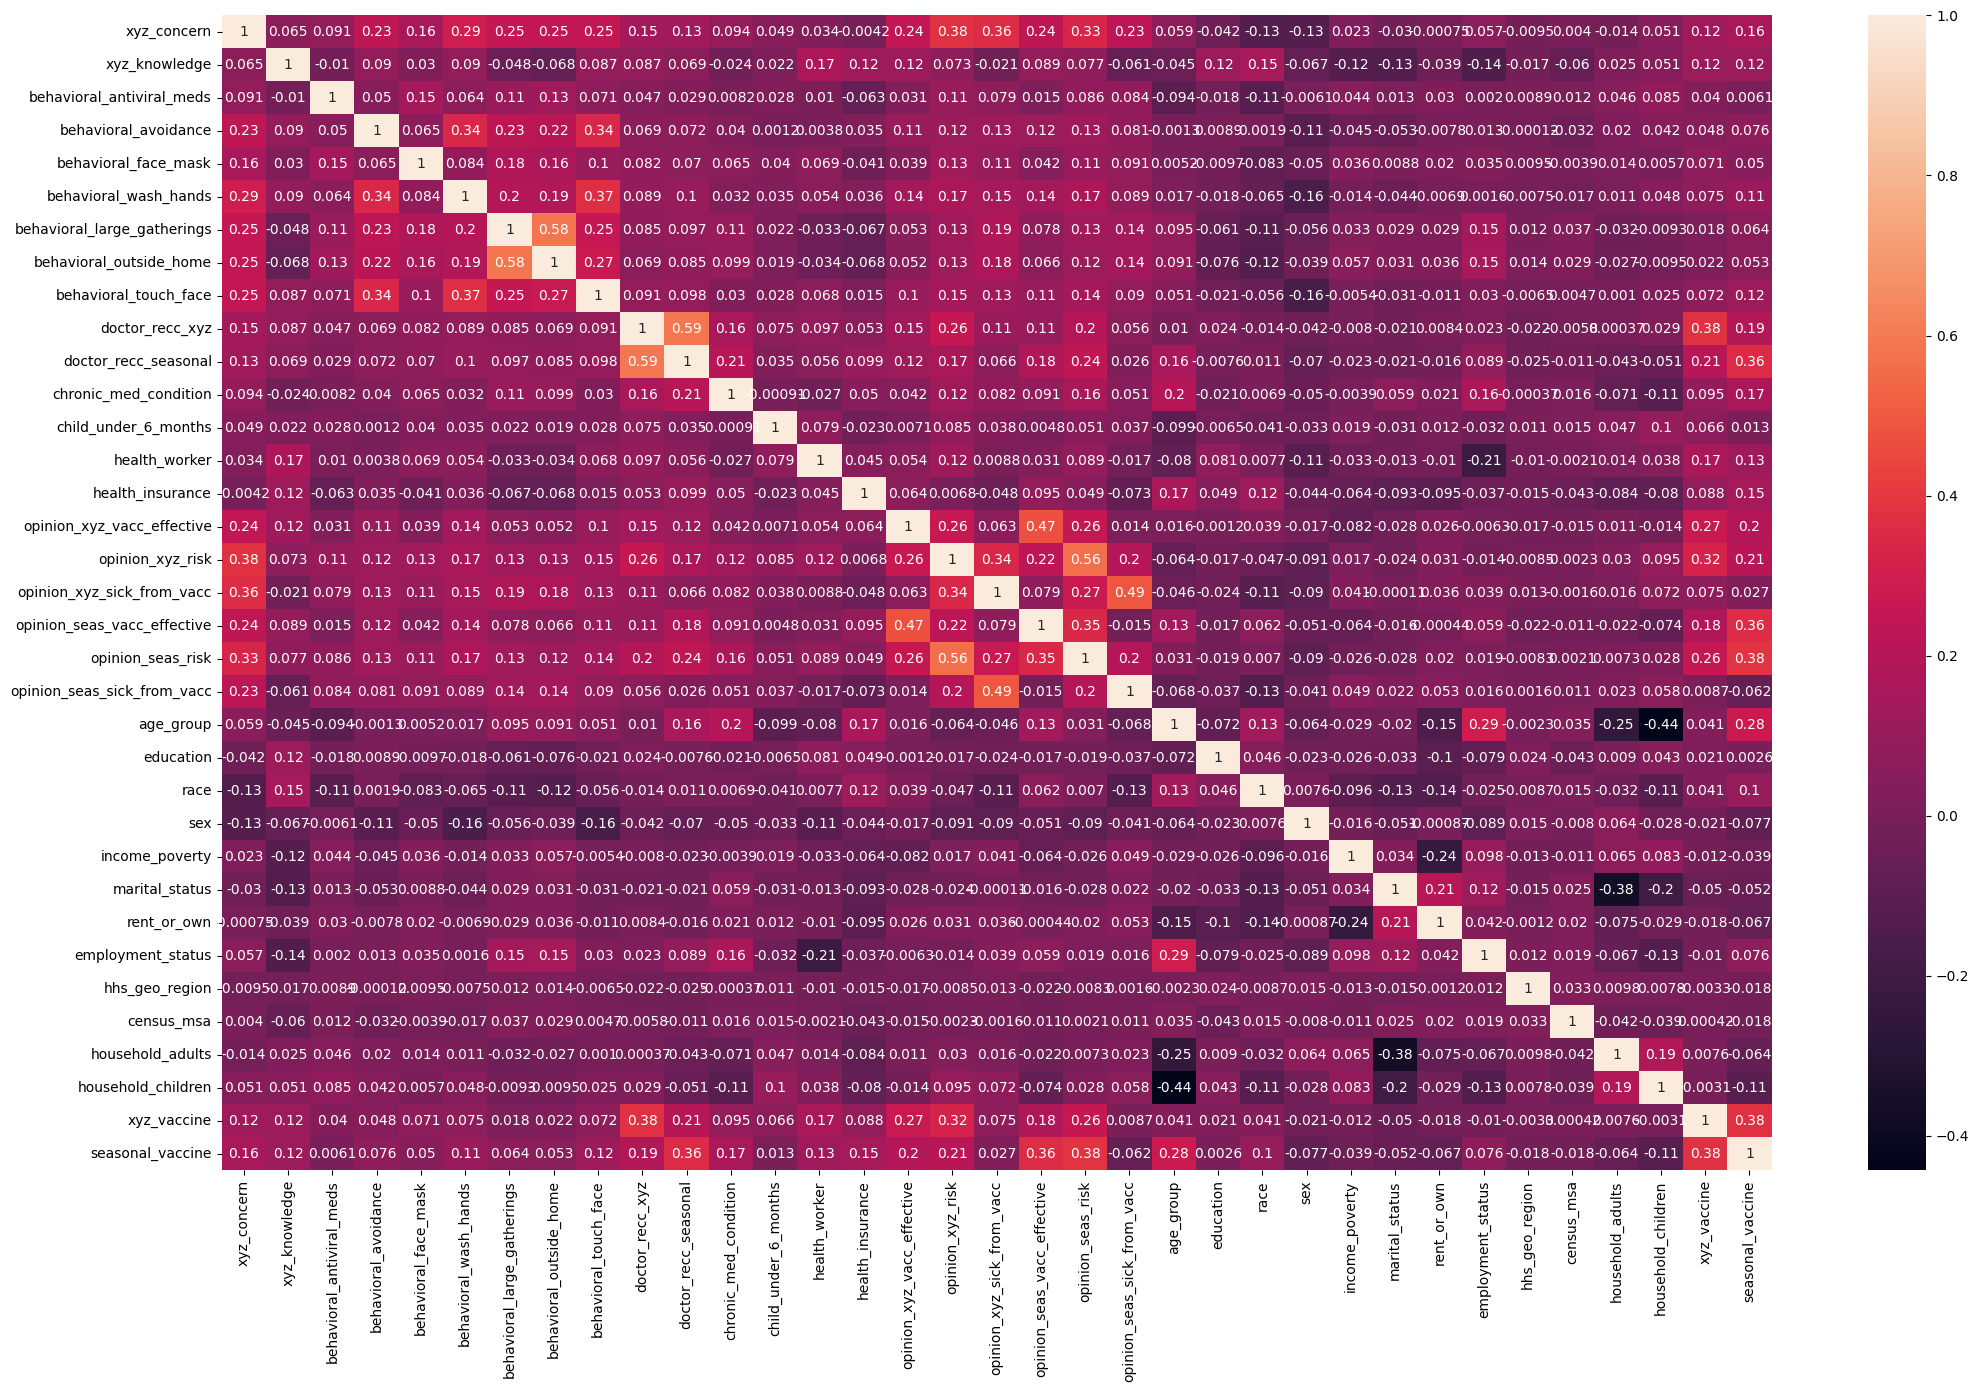

In [21]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(),annot=True)

In [22]:
input1 = df.drop(["xyz_vaccine", "seasonal_vaccine"], axis=1)
target = df[["xyz_vaccine", "seasonal_vaccine"]]

In [23]:
input1.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,2,1,2,8,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,2,2,0,1,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,2,1,0,9,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,2,2,2,5,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2,4,3,0,0,0,1,0,9,0,1.0,0.0


In [24]:
input1.shape

(26707, 33)

In [25]:
testing.shape

(26708, 33)

# Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(input1, target, test_size=0.2, random_state=42)

# Model Building

In [27]:
from sklearn.multioutput import MultiOutputClassifier

In [28]:
models = []
roc_auc_scores = []
accuracies = []

In [29]:
classifier = MultiOutputClassifier(RandomForestClassifier())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores.append(roc_auc)

accuracy = classifier.score(X_test,y_test)
accuracies.append(accuracy)

models.append('RandomForestClassifier')

print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

ROC AUC score = 0.7320069984950416
Accuracy = 0.6759640584050918


In [30]:
classifier = MultiOutputClassifier(RandomForestClassifier())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores.append(roc_auc)

accuracy = classifier.score(X_test,y_test)
accuracies.append(accuracy)

models.append('RandomForestClassifier')

print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

ROC AUC score = 0.7429041520276016
Accuracy = 0.6866342193934856


In [31]:
classifier = MultiOutputClassifier(DecisionTreeClassifier())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores.append(roc_auc)

accuracy = classifier.score(X_test,y_test)
accuracies.append(accuracy)

models.append('DecisionTreeClassifier')

print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

ROC AUC score = 0.6570969807493341
Accuracy = 0.5166604268064395


In [32]:
classifier = MultiOutputClassifier(KNeighborsClassifier())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores.append(roc_auc)

accuracy = classifier.score(X_test,y_test)
accuracies.append(accuracy)

models.append('KNeighborsClassifier')

print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

ROC AUC score = 0.6666005080052954
Accuracy = 0.5917259453388244


In [33]:
classifier = MultiOutputClassifier(XGBClassifier())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores.append(roc_auc)

accuracy = classifier.score(X_test,y_test)
accuracies.append(accuracy)

models.append('XGBClassifier')

print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

ROC AUC score = 0.7375088086590027
Accuracy = 0.6688506177461625


In [34]:
classifier = MultiOutputClassifier(AdaBoostClassifier())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores.append(roc_auc)

accuracy = classifier.score(X_test,y_test)
accuracies.append(accuracy)

models.append('AdaBoostClassifier')

print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

ROC AUC score = 0.7311941054180999
Accuracy = 0.6729689254960689


In [35]:
classifier = MultiOutputClassifier(GaussianNB())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores.append(roc_auc)

accuracy = classifier.score(X_test,y_test)
accuracies.append(accuracy)

models.append('GaussianNB')

print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

ROC AUC score = 0.7299361050674325
Accuracy = 0.6078247847248222


In [36]:
classifier = MultiOutputClassifier(SVC())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
roc_auc_scores.append(roc_auc)

accuracy = classifier.score(X_test,y_test)
accuracies.append(accuracy)

models.append('SVC')

print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

ROC AUC score = 0.7167229825531407
Accuracy = 0.6703481842006739


# Compare Models

In [37]:
models_df = pd.DataFrame({'Model': models, 'ROC AUC SCORE': roc_auc_scores,"Accuracy":accuracies})
models_df.set_index('Model', inplace=True)
models_df.sort_values(by='ROC AUC SCORE', ascending=False)

,ROC AUC SCORE,Accuracy
Model,,
GradientBoostingClassifier,0.742904,0.686634
XGBClassifier,0.737509,0.668851
RandomForestClassifier,0.732007,0.675964
AdaBoostClassifier,0.731194,0.672969
GaussianNB,0.729936,0.607825
SVC,0.716723,0.670348
KNeighborsClassifier,0.666601,0.591726
DecisionTreeClassifier,0.657097,0.516660


In [38]:

from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for GradientBoostingClassifier
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 4, 5]
}

# Initialize the MultiOutputClassifier with GradientBoostingClassifier
base_classifier = GradientBoostingClassifier()
multi_target_classifier = MultiOutputClassifier(base_classifier)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=multi_target_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring='roc_auc',
    cv=5,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPUs
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=MultiOutputClassifier(estimator=GradientBoostingClassifier()),
                   n_jobs=-1,
                   param_distributions={'estimator__learning_rate': [0.01, 0.05,
                                                                     0.1],
                                        'estimator__max_depth': [3, 4, 5],
                                        'estimator__n_estimators': [100, 200,
                                                                    300]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [39]:
# Best estimator from RandomizedSearchCV
best_classifier = random_search.best_estimator_

# Predict on the test set
y_pred = best_classifier.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)  # Change to 'micro', 'samples', or other if needed
roc_auc_scores.append(roc_auc)

# Calculate accuracy
accuracy = best_classifier.score(X_test, y_test)
accuracies.append(accuracy)

models.append('GradientBoostingClassifier with RandomizedSearchCV')

print("Best Parameters:", random_search.best_params_)
print("ROC AUC score =", roc_auc)
print("Accuracy =", accuracy)

Best Parameters: {'estimator__n_estimators': 200, 'estimator__max_depth': 4, 'estimator__learning_rate': 0.05}
ROC AUC score = 0.7443598668309269
Accuracy = 0.6836390864844627


In [40]:
testing.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1,2,1,0,1,2,2,0,7,0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,0,0,3,1,2,2,2,0,1,2,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,3,2,3,1,1,0,1,0,5,2,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,4,0,3,0,0,0,1,2,5,0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,1,0,0,0,0,2,1,0,6,2,0.0,1.0


In [41]:
testing.shape

(26708, 33)

In [42]:
best_classifier.score(X_test, y_test)

0.6836390864844627

In [43]:
best_classifier.score(X_train, y_train)

0.6972150713784226

In [44]:
best_classifier.score(input1, target)

0.6944995694012805

In [45]:
roc_auc_score(y_test, best_classifier.predict(X_test))

0.7443598668309269

In [46]:
roc_auc_score(y_train, best_classifier.predict(X_train))

0.7573740423630195

In [47]:
roc_auc_score(target, best_classifier.predict(input1))

0.7547744653897108

# Conclusion

The best classifier is Gradient Boosting Classifier which gives following data:
<b> ROC_AUC_Score:</b>
    <br>test_data = 0.7443598668309269
    <br>train_data = 0.7573740423630195
    

# Submission File

In [48]:
y_pred_prob = best_classifier.predict_proba(testing)

# Extract probabilities for each class
xyz_prob = y_pred_prob[0][:, 1]  # Probabilities for xyz_vaccine
seasonal_prob = y_pred_prob[1][:, 1]  # Probabilities for seasonal_vaccine

In [49]:
id = pd.read_csv("test_set_features.csv")
id = id.respondent_id
id=pd.DataFrame(id)

In [50]:
id

,respondent_id
0,26707
1,26708
2,26709
3,26710
4,26711
...,...
26703,53410
26704,53411
26705,53412
26706,53413


In [51]:
id["xyz_prob"] = xyz_prob
id["seasonal_prob"] = seasonal_prob

In [52]:
id

,respondent_id,xyz_prob,seasonal_prob
0,26707,0.105780,0.188053
1,26708,0.032799,0.038070
2,26709,0.501577,0.798254
3,26710,0.602009,0.870278
4,26711,0.252683,0.449582
...,...,...,...
26703,53410,0.365091,0.531498
26704,53411,0.151419,0.265689
26705,53412,0.111674,0.194720
26706,53413,0.053772,0.348431


In [53]:
id.rename(columns={"id": "respondent_id", "xyz_prob": "xyz_vaccine", "seasonal_prob": "seasonal_vaccine"}, inplace=True)

In [54]:
id.to_csv('final_submission.csv', index=False)